In [1]:
# importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data into python environment
train_data = pd.read_csv('/content/train_LZdllcl.csv')
test_data = pd.read_csv('/content/test_2umaH9m.csv')

In [3]:
#checking the first few rows of the train data
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
#cheking the first few rows of the test data
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
#cheking the data for types of columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
# cheking for missing values
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#checing the shape of the data
train_data.shape

(54808, 14)

In [9]:
#cheking the unique values in the column
train_data['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [10]:
#creating a variable to store the mode of column
mode_education = train_data['education'].mode()
mode_education

0    Bachelor's
Name: education, dtype: object

In [11]:
# filling for missing values
train_data['education'] = train_data['education'].fillna(mode_education[0])

In [12]:
# cheking for missing values
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

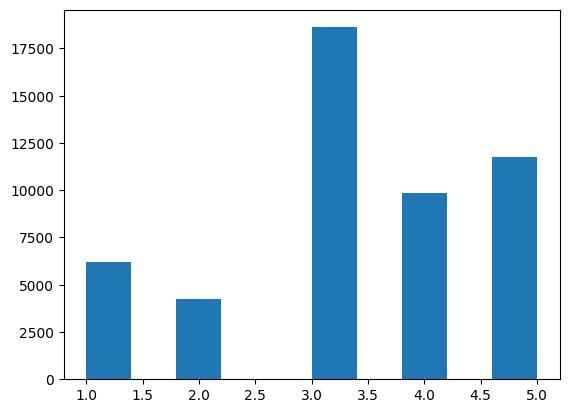

In [14]:
#will fill with mode
plt.hist(train_data['previous_year_rating'])
plt.show()

In [15]:
# filling the missing values
train_data['previous_year_rating'] = train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median())

In [16]:
#cheking for missing values
train_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Outlier handling for train data

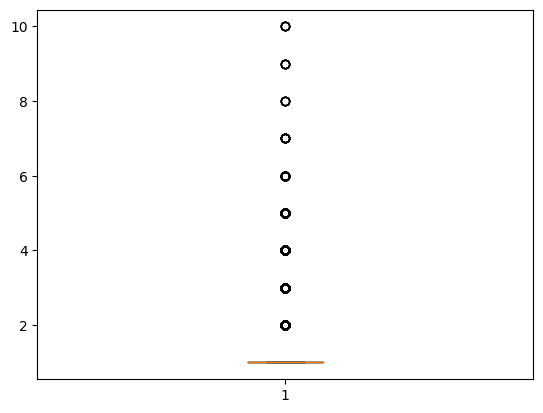

In [17]:
#cheking the box plot for outliers
plt.boxplot(train_data['no_of_trainings'])
plt.show()

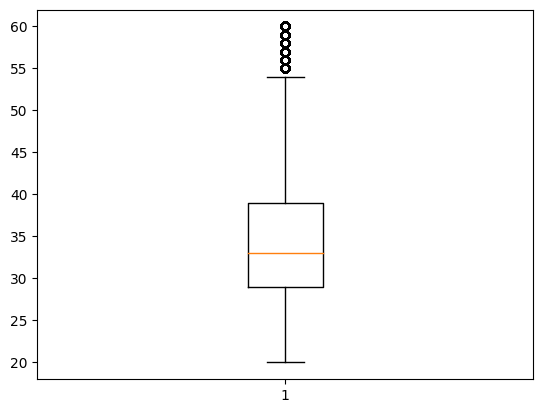

In [18]:
#cheking for outliers
plt.boxplot(train_data['age'])
plt.show()

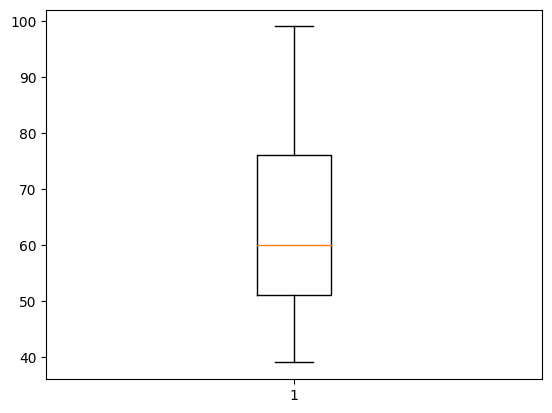

In [19]:
#cheking for outliers
plt.boxplot(train_data['avg_training_score'])
plt.show()

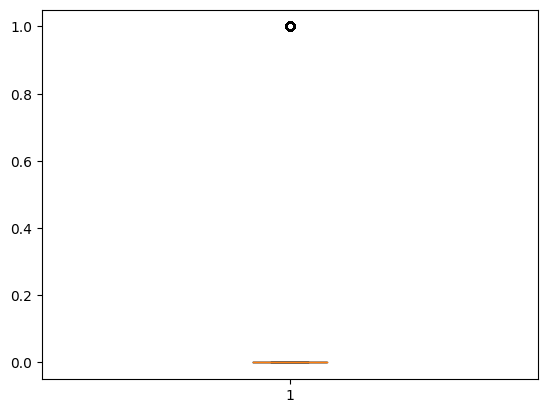

In [20]:
#cheking for outliers
plt.boxplot(train_data['awards_won?'])
plt.show()

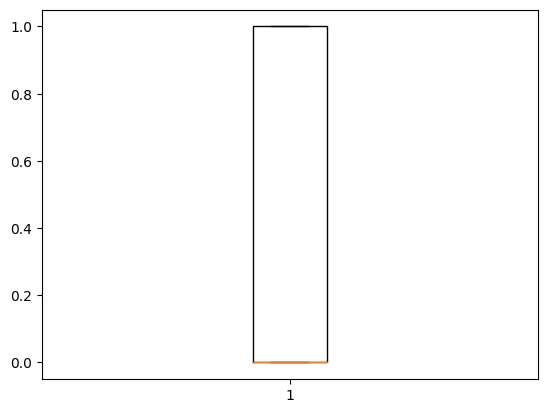

In [21]:
#cheking for outliers
plt.boxplot(train_data['KPIs_met >80%'])
plt.show()

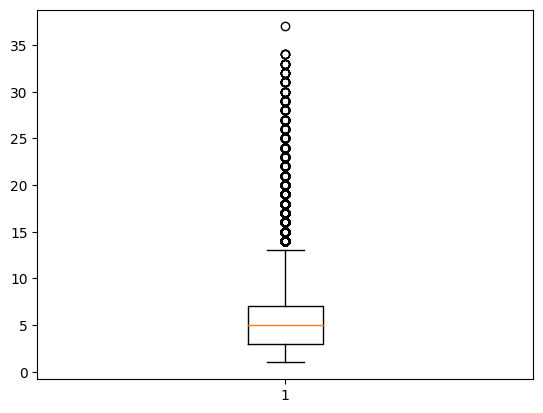

In [22]:
#cheking for outliers
plt.boxplot(train_data['length_of_service'])
plt.show()

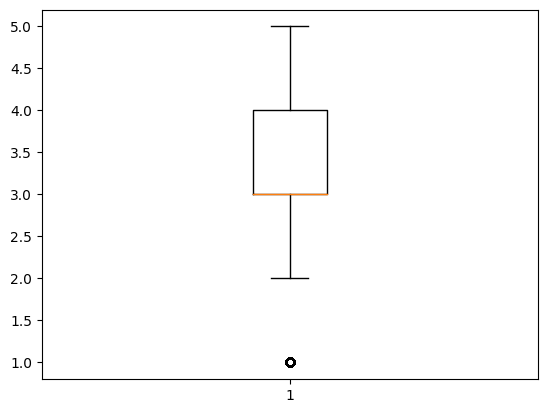

In [23]:
#cheking for outliers
plt.boxplot(train_data['previous_year_rating'])
plt.show()

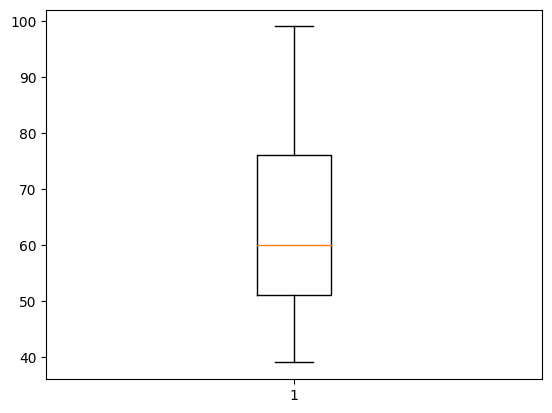

In [24]:
#cheking for outliers
plt.boxplot(train_data['avg_training_score'])
plt.show()

In [26]:
#columns to be capped for outliers
features = ['no_of_trainings','age','avg_training_score','awards_won?','KPIs_met >80%','length_of_service','previous_year_rating']

In [25]:
#writing a function to do outlier capping in columns
def iqr_capping(data,cols):
  for col in cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    data[col]=np.where(data[col]>upper_limit,upper_limit,data[col])
    data[col]=np.where(data[col]<lower_limit,lower_limit,data[col])


In [27]:
#calling the capping funtion
iqr_capping(train_data,features)

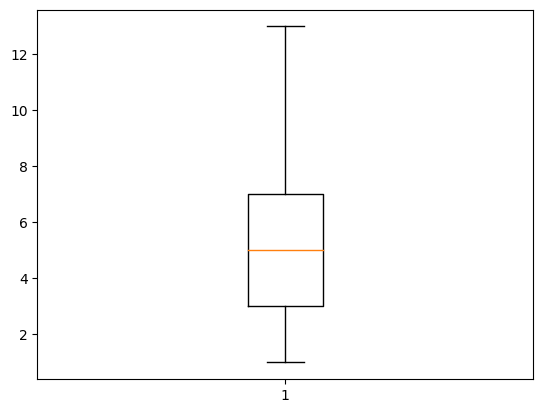

In [28]:
#checking for outliers after capping
plt.boxplot(train_data['length_of_service'])
plt.show()

#Encoding for train data

In [35]:
#classifiying the data into x and y
x= train_data.drop(['is_promoted','employee_id'],axis=1)
y=train_data['is_promoted']

In [36]:
#one hot encoding
x=pd.get_dummies(x,dtype=int)

In [37]:
#cheking the first few rows of x
x.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,1.0,39.0,1.5,10.0,0.0,0.0,50.0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


# Preprocessing for test data

In [38]:
#cheking for missing values
test_data.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [39]:
#cheking the rows for types of colunns
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [40]:
#cheking the unique values
test_data['education'].value_counts()

education
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64

In [41]:
#filling the missing values
mode_education1 = test_data['education'].mode()
mode_education1

0    Bachelor's
Name: education, dtype: object

In [42]:
# filling the missing values
test_data['education'] = test_data['education'].fillna(mode_education1[0])

In [43]:
#cheking for missing values
test_data.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

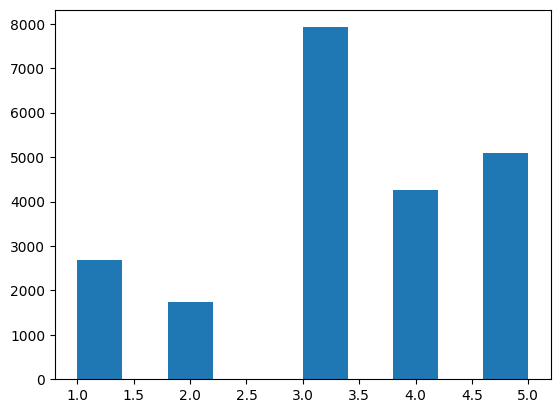

In [44]:
#going to fill with mode but jsut cheking
plt.hist(test_data['previous_year_rating'])
plt.show()

In [45]:
#cheking for unique values in column
test_data['previous_year_rating'].value_counts()

previous_year_rating
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: count, dtype: int64

In [46]:
#getting mode in a variable
mode_previousyear = test_data['previous_year_rating'].mode()
mode_previousyear

0    3.0
Name: previous_year_rating, dtype: float64

In [47]:
#filling missing values
test_data['previous_year_rating'] = test_data['previous_year_rating'].fillna(mode_previousyear[0])

In [48]:
#cheking for missing values
test_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

#outlier handling

In [52]:
# features of test data to be capped for outliers
features2 = test_data[['no_of_trainings','age','avg_training_score','awards_won?','KPIs_met >80%','length_of_service','previous_year_rating']]

In [53]:
#cheking the features
features2

,no_of_trainings,age,avg_training_score,awards_won?,KPIs_met >80%,length_of_service,previous_year_rating
0,1,24,77,0,1,1,3.0
1,1,31,51,0,0,5,3.0
2,1,31,47,0,0,4,1.0
3,3,31,65,0,0,9,2.0
4,1,30,61,0,0,7,4.0
...,...,...,...,...,...,...,...
23485,1,24,61,0,0,1,3.0
23486,1,31,74,0,0,7,3.0
23487,1,26,50,0,0,4,4.0
23488,3,27,70,0,0,1,3.0


In [54]:
#calling the function to capp the outliers
iqr_capping(test_data,features2)

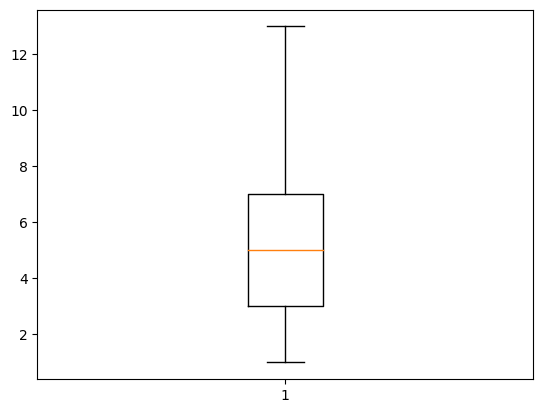

In [55]:
#cheking the features whether capped or not for outliers
plt.boxplot(test_data['length_of_service'])
plt.show()

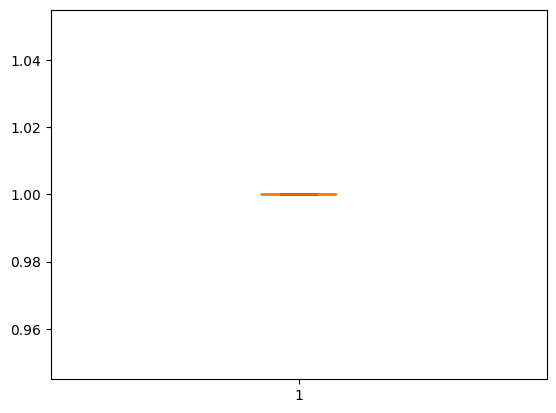

In [58]:
#cheking the outliers
plt.boxplot(test_data['no_of_trainings'])
plt.show()

# encoding for testing data

In [59]:
# taking variables into x2
x2= test_data.drop(['employee_id'],axis=1)

In [60]:
#one hot encoding
x2=pd.get_dummies(x2,dtype=int)

In [61]:
#chekking for first few rows
x2.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,24.0,3.0,1.0,1.0,0.0,77.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1.0,31.0,3.0,5.0,0.0,0.0,51.0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,1.0,31.0,1.5,4.0,0.0,0.0,47.0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,1.0,31.0,2.0,9.0,0.0,0.0,65.0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1.0,30.0,4.0,7.0,0.0,0.0,61.0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


#modelling

In [62]:
#calling the logistic regression function
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [63]:
#fitting the logistic regression function with x and y
lr.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
#predicting the target variable for x2
y_predict=lr.predict(x2)

In [74]:
y_predict.shape

(23490,)

In [79]:
#importing the score libraries
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

In [68]:
test_target=pd.read_csv('/content/sample_submission_M0L0uXE.csv')

In [69]:
test_target.shape

(23490, 2)

In [70]:
test_data.shape

(23490, 13)

In [71]:
test_target.columns

Index(['employee_id', 'is_promoted'], dtype='object')

In [72]:
y_test=test_target['is_promoted']

In [75]:
f1_score(y_test,y_predict)

0.0

#Accuracy score

In [78]:
accuracy_score(y_test,y_predict)

0.9836100468284377

In [80]:
precision_score(y_test,y_predict)

0.0

In [81]:
recall_score(y_test,y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [82]:
test_target_copy = test_target.copy()

In [83]:
test_target_copy.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [84]:
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [85]:
test_target_copy['is_promoted']=y_predict

In [86]:
test_target_copy.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [87]:
test_target_copy.to_csv('submission.csv',index=False)